## Preprocessing the SAVEE Data

In [13]:
import os

import pandas as pd

folder_path = "SAVEE/ALL"

filenames = []
labels = []

label_mapping = {
    "a": "anger",
    "d": "disgust",
    "f": "fear",
    "h": "happiness",
    "sa": "sadness",
    "su": "surprise",
    "n": "neutral"
}

for filename in os.listdir(folder_path):
  if filename.endswith(".wav"):
    label = filename.split("_")[1][0]
    if label in label_mapping:
      label = label_mapping[label]
      filename = os.path.join(folder_path, filename)
      filenames.append(filename)
      labels.append(label)

df_savee = pd.DataFrame({'Filename': filenames, 'Label': labels})

print(df_savee.head())

               Filename  Label
0  SAVEE/ALL\DC_a01.wav  anger
1  SAVEE/ALL\DC_a02.wav  anger
2  SAVEE/ALL\DC_a03.wav  anger
3  SAVEE/ALL\DC_a04.wav  anger
4  SAVEE/ALL\DC_a05.wav  anger


## Preprocessing TESS Data

In [14]:
# Define the base folder path
base_folder_path = "TESS/TESS Toronto emotional speech set data"

# Initialize empty lists to store absolute file paths and labels
filepaths = []
labels = []

label_mapping = {
    'Sad': 'sadness',
    'fear': 'fear',
    'Fear': 'fear',
    'happy': 'happiness',
    'angry': 'anger',
    'neutral': 'neutral',
    'disgust': 'disgust',
    'surprise': 'surprise',
    'sad': 'sadness',
    'surprised': 'surprise'
}

for subfolder in os.listdir(base_folder_path):
    subfolder_path = os.path.join(base_folder_path, subfolder)

    if os.path.isdir(subfolder_path):
        label = subfolder.split("_")[-1]
        if label in label_mapping:
            label = label_mapping[label]
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".wav"):
                filepath = os.path.join(subfolder_path, filename)
                filepaths.append(filepath)
                labels.append(label)

df_tess = pd.DataFrame({'Filename': filepaths, 'Label': labels})

# Display the DataFrame
print(df_tess.head())

                                            Filename  Label
0  TESS/TESS Toronto emotional speech set data\OA...  anger
1  TESS/TESS Toronto emotional speech set data\OA...  anger
2  TESS/TESS Toronto emotional speech set data\OA...  anger
3  TESS/TESS Toronto emotional speech set data\OA...  anger
4  TESS/TESS Toronto emotional speech set data\OA...  anger


## Preprocess cremad data.

In [15]:
folder_path = "cremad/AudioWAV"

# Initialize empty lists to store absolute file paths and labels
filepaths = []
labels = []

# Define a mapping of labels to emotions
label_mapping = {
    'ANG': 'anger',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'happiness',
    'NEU': 'neutral',
    'SAD': 'sadness',
}

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        label = filename.split("_")[2]
        if label in label_mapping:
            label = label_mapping[label]  # Map label to emotion
            filepath = os.path.join(folder_path, filename)  # Create absolute file path
            filepaths.append(filepath)
            labels.append(label)

# Create a Pandas DataFrame
df_cremad = pd.DataFrame({'Filename': filepaths, 'Label': labels})

# Display the DataFrame
print(df_cremad.head())

                              Filename      Label
0  cremad/AudioWAV\1001_DFA_ANG_XX.wav      anger
1  cremad/AudioWAV\1001_DFA_DIS_XX.wav    disgust
2  cremad/AudioWAV\1001_DFA_FEA_XX.wav       fear
3  cremad/AudioWAV\1001_DFA_HAP_XX.wav  happiness
4  cremad/AudioWAV\1001_DFA_NEU_XX.wav    neutral


## Prepare the data

In [16]:
merged_df = pd.concat([df_cremad, df_savee, df_tess], ignore_index=True)
merged_df.reset_index(drop=True, inplace=True)
print(merged_df.head())

                              Filename      Label
0  cremad/AudioWAV\1001_DFA_ANG_XX.wav      anger
1  cremad/AudioWAV\1001_DFA_DIS_XX.wav    disgust
2  cremad/AudioWAV\1001_DFA_FEA_XX.wav       fear
3  cremad/AudioWAV\1001_DFA_HAP_XX.wav  happiness
4  cremad/AudioWAV\1001_DFA_NEU_XX.wav    neutral


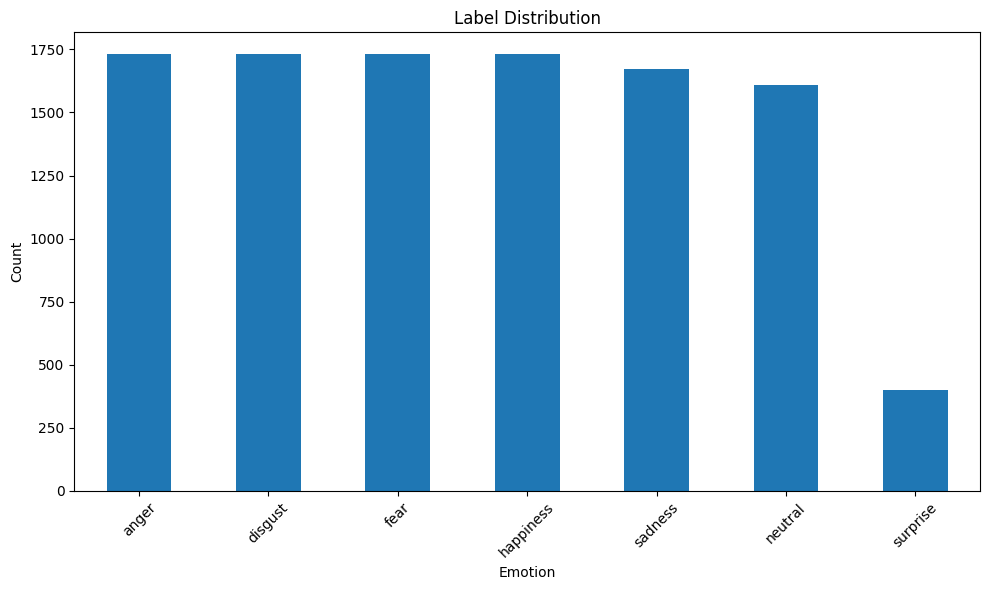

In [19]:
# Plot

import matplotlib.pyplot as plt
label_counts = merged_df['Label'].value_counts()
label_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Label Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('label_distribution.png', dpi=300)
plt.show()

In [ ]:
merged_df.to_csv('file_paths_labels.csv', index=False, header=True)